## 과제: 선형 SVM 분류

### 목표

Iris 데이터셋에서 Iris Setosa와 Iris Versicolor를 분류하는 선형 SVM 모델을 학습하고, 결정 경계를 시각화합니다.

1. 데이터 준비

In [1]:
# 패키지 로드
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
iris = load_iris()
X = iris.data[:, 2:4]  # 꽃잎 길이와 꽃잎 너비 선택
y = iris.target

In [3]:
# Iris Setosa와 Iris Versicolor 클래스만 선택
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

2. 모델 학습

In [4]:
svc = SVC(kernel="linear")  # 선형 SVM 모델 정의
svc.fit(X, y)  # 모델 학습

SVC(kernel='linear')

In [5]:
# 학습된 모델의 지원 벡터 출력
print("Support Vectors:")
print(svc.support_vectors_)

Support Vectors:
[[1.9 0.4]
 [3.  1.1]]


3. 결정 경계 시각화

In [6]:
# 결정 경계 계산
w = svc.coef_[0]  # 모델의 가중치
b = svc.intercept_[0]  # 모델의 절편
x_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
decision_boundary = -(w[0] / w[1]) * x_plot - b / w[1]
margin_positive = decision_boundary + 1 / w[1]
margin_negative = decision_boundary - 1 / w[1]

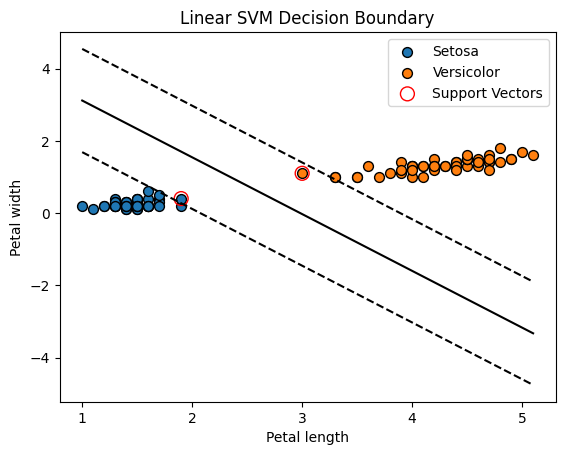

In [7]:
# 데이터 산점도
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Setosa', edgecolor='k', s=50)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Versicolor', edgecolor='k', s=50)

# 결정 경계와 마진 플롯
plt.plot(x_plot, decision_boundary, 'k-')
plt.plot(x_plot, margin_positive, 'k--')
plt.plot(x_plot, margin_negative, 'k--')

# 지원 벡터 시각화
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='r', label='Support Vectors')

# 플롯 설정
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.title('Linear SVM Decision Boundary')
plt.show()